-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* TRABALHO 3 INTRODUCAO À INTELIGENCIA ARTIFICIAL
  * Aluno: Vitor de Oliveira Araujo Araruna
  * Matricula: 202060980
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
- Classe Perceptron utilizada para simular uma um modelo de classificacão
    - Tal classe simula o comportamento de um perceptron, utilizando o conceitos dos pesos, inicialmente aleatórios , bias, épocas (para fins de loop de treinamento) e nossa taxa de aprendizagem (alpha)
    - Observa-se funcões cruciais usados por um modelo como: FIT (para treinamento) e PREDICT (para que o modelo tente predizer o rótulo de uma entrada)
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
class Perceptron(object):

  def __init__(self, alpha=0.1, epochs=10):
    np.random.seed(1) # [OBS1]
    self.alpha = alpha # alpha é a nossa taxa de aprendizado
    self.epochs = epochs
    self.weights = None
    self.bias = None



  def activation(self, signal):
    return np.where( signal >= 0, 1, 0) # Função degrau de ativação


  def predict(self, X):
      # Calcule o output do perceptron: [ATIVIDADE 3]
      sum = np.dot(X, self.weights)
      sum += self.bias
      #somar o bias e manda pra activation
      return(self.activation(sum))
  
  def fit (self, X, Y):
    n_samples, n_features = X.shape
    # Inicialize os Pesos e Bias: [ATIVIDADE 1]
    self.weights = 2*np.random.random((n_features,)) - 1
    self.bias = 2*np.random.random() -1

    for epoch in range(self.epochs):
      for x_i,y_esperado in zip(X,Y):
        # Defina as funções de treinamento: [ATIVIDADE 2]
        output = self.predict(x_i)
        ## agr pego meu output e recalculo os pesos e bias
        erro = (y_esperado - output)
        self.weights += x_i * self.alpha * erro
        self.bias = self.bias + self.alpha * erro

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
- Aqui defino minha funcao de acurácia, ou seja, desejo informar qual foi meu percentual de acerto. Em outras palavras, o quão próximo do resultado esperado, o resultado obtido chegou
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [3]:
def accuracy(y_true, y_pred):
    hits = 0
    length = len(y_pred)
    # Crie uma função de acurácia simples: [ATIVIDADE 4]
    for i in range(length):
      if y_true[i] == y_pred[i]:
        hits +=1
    
    result = hits/length

    return result

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
- Teste no perceptron para classificar o problema acima com acurácia de 1.0 (100%)
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Perceptron classification accuracy 1.0


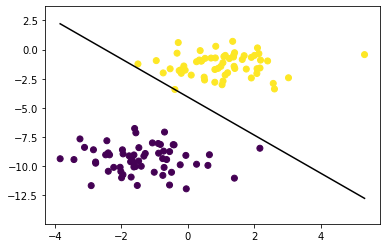

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

p = Perceptron(alpha=0.01, epochs=10)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

# Visualizando o problema que foi solucionado

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
- Baixando a base de dados que vamos rotular com os dados de teste
- Esse dataset é composto "imagens" de números de 0 à 9, e contém 60.000 exemplos de treinamento e 10.000 exemplos de teste.
- Depois vou extrair o mesmo
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [5]:
# # download do dataset (training set images)
# !curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
# # download do dataset (training set labels)
# !curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
# # download do dataset (testing set images)
# !curl -O http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
# # download do dataset (testing set labels)
# !curl -O http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

In [6]:
# # Extrair arquivos
# !gunzip *

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
- Funcões disponibilizadas para realizar a leitura dos dados:
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [7]:
def bytes_to_int(byte_data):
    return int.from_bytes(byte_data, 'big')

def read_images(filename, n_max_images=None, show = False):
    images = []
    with open(filename, 'rb') as f:
        _ = f.read(4)  # magic number
        n_images = bytes_to_int(f.read(4))
        if n_max_images:
            n_images = n_max_images
        n_rows = bytes_to_int(f.read(4))
        n_columns = bytes_to_int(f.read(4))
        for image_idx in range(n_images):
            image = []
            for row_idx in range(n_rows):
                row = []
                for col_idx in range(n_columns):
                    if show:
                        pixel = f.read(1)
                    else:
                        pixel = bytes_to_int(f.read(1))
                    row.append(pixel)
                image.append(row)
            images.append(image)
    return images

def read_labels(filename, n_max_labels=None):
    labels = []
    with open(filename, 'rb') as f:
        _ = f.read(4)  # magic number
        n_labels = bytes_to_int(f.read(4))
        if n_max_labels:
            n_labels = n_max_labels
        for label_idx in range(n_labels):
            label = bytes_to_int(f.read(1))
            labels.append(label)
    return labels

----------
- Transformando as imegens em um vetor de uma dimensao:
----------

In [8]:
def flatten_list(l):
    return [pixel for sublist in l for pixel in sublist]
    
def extract_features(X):
    return [flatten_list(sample) for sample in X]

# A função `extract_features` seria responsável por extrair features das imagens, porém como estamos carregando todos os dados diretamente nos neurônios, ela só irá chamar a função `flatten_list` para todos os samples.

# A função `flatten_list` irá transformar o que era uma matriz de dados 28 x 28 em um simples vetor com 784 valores que será carregado como input para nosso perceptron.

----------
- Pré-processamento: estou realizando a leitura dos dados e dividindo-os em dados de treino e dados de teste
----------

In [9]:
TEST_DATA_FILENAME = 't10k-images-idx3-ubyte'
TEST_LABELS_FILENAME = 't10k-labels-idx1-ubyte'
TRAIN_DATA_FILENAME = 'train-images-idx3-ubyte'
TRAIN_LABELS_FILENAME = 'train-labels-idx1-ubyte'

n_train = 100 # Numero de imagens carregadas para treinamento
n_test = 10 # Numero de imagens carregadas para teste

x_train = read_images(TRAIN_DATA_FILENAME, n_train)
y_train = np.array(read_labels(TRAIN_LABELS_FILENAME, n_train)).reshape(n_train,1)
print(len(x_train[0]))
print(len(x_train[0][0]))

x_test = read_images(TEST_DATA_FILENAME, n_test)
y_test = read_labels(TEST_LABELS_FILENAME, n_test)

x_train = np.array(extract_features(x_train))/255 # Transformando em numpy array e normalizando (valores entre 0 e 1)
x_test = np.array(extract_features(x_test))/255 # Transformando em numpy array e normalizando (valores entre 0 e 1)
print(len(x_train[0]))

28
28
784


----------
- Modelagem: 
  - 10 perceptrons classificadores, 1 para cada classe (número).
  - Como cada classificador será treinado individualmente, será necessário transformar o vetor de labels para cada neurônio de maneira a garantir que o erro será calculado corretamente.
  - Exemplo para o perceptron classificador de 1s: Label = [0,1,4,1,5] -> [0, 1, 0, 1, 0]
  - Além disso a saída será individualizada, ou seja, não teremos uma saída final com a previsão da rede, ao invés disso teremos 10 saídas independentes que precisamos unir para avaliar a saída completa.
  - Aqui surgirá um problema de quebrar os empates, ou seja, quando mais de um perceptron ativar para uma mesma entrada. Nesse primeiro momento iremos converter o vetor de labels para que cada label seja equivalente a um vetor de 10 posições de 0s e 1s correspondente ao output desejado da rede completa unida, e verificaremos se o vetor resultante da nossa rede é igual ao desejado.
  - Exemplo: Label = [5] -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
----------

In [10]:
# PERCEPTRON PARA CLASSIFICAR 1's

P = Perceptron(alpha=0.1, epochs=50)

# Formatar labels de treinamento: [ATIVIDADE 5]
y_train_formated = np.where(y_train==1 , 1, 0)

# Treinar Rede: [ATIVIDADE 6]
P.fit(x_train, y_train_formated)

# Gerar vetor de predições: [ATIVIDADE 7]
predictions = P.predict(x_test)

print(y_test)
print(predictions)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
[0 0 1 0 0 1 0 0 0 0]


----------
- Agora realizando a classificacão utilizando os 10 perceptrons:
----------

In [11]:
# AGR VAMOS UTILIZAR OS 10 PERCEPTRONS 

P_list = []
# Inicialize uma lista de 10 perceptrons: [ATIVIDADE 8]
for i in range(10):
    P_list.append(Perceptron(alpha=0.1, epochs=50))

# Loop de treinamento: [Atividade 9]
for index, perceptron in enumerate(P_list):
    #formatacao
    y_train_formated = np.where(y_train==index , 1, 0)
    #chamar fit com dados formatados
    perceptron.fit(x_train, y_train_formated)

predictions = []
# Loop de predições: [Atividade 10]
for index, perceptron in enumerate(P_list):
    predictions.append(perceptron.predict(x_test))


In [12]:
predictions

[array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])]

----------
- Formatando tudo para calcular acuracia: 
  - A variável predictions contém o resultado da predição dos nossos 10 perceptrons, e para cada um deles existe um vetor de n_test predições. 
  - Para que possamos calcular a acurácia precisamos agrupar a primeira predição de cada perceptron, a segunda de cada perceptron, e assim por diante.
  - Além disso precisamos converter o nosso vetor de labels para comparar com as predições. Lembrando que aqui teremos o problema de quebrar empates, e com essa solução iremos considerar que um empate, ou seja, quando dois ou mais perceptrons ativarem para o mesmo input, é um erro.
----------

In [13]:
# Reformatando o vetor de predições
grouped_predictions = []
for i in range(n_test):
  singlePrediction = []
  for j, prediction in enumerate(predictions):
    singlePrediction.append(prediction[i])
  grouped_predictions.append(singlePrediction)

# Reformatando o vetor de labels
def convert_number_to_array_prediction(n):
  array_prediction = np.zeros(10)
  array_prediction[n] = 1
  return array_prediction

def convert_y_test_to_array_prediction(ytest):
  convertedList = []
  for i in ytest:
    convertedList.append(convert_number_to_array_prediction(i))
  return np.array(convertedList)

# Salvando novo vetor de y_test
y_test_as_array = convert_y_test_to_array_prediction(y_test)

# Definindo nova função de acuracia [OBS2]
hits = 0
for i, prediction in enumerate(grouped_predictions):
  # print(prediction)
  # print(convertedArray[i])
  if (prediction == y_test_as_array[i]).all():
    hits+=1

# print('gp', grouped_predictions)
# print('y', y_test_as_array)
print('Acuracia: ',hits/n_test)

Acuracia:  0.7


------------
- Atividade extra (11): Aumentar Acurácia
  - Altere o valor de n_test para 100, e modifique os valores de n_train, n_epocas, alpha, etc. Consiga uma acuracia mínima de 70%.



- Alteracões: 
  - imagens de treino: 800
  - alpha: 5
  - epocas: 30
------------

In [14]:
n_train = 800 # Numero de imagens carregadas para treinamento
n_test = 100 # Numero de imagens carregadas para teste

x_train = read_images(TRAIN_DATA_FILENAME, n_train)
y_train = np.array(read_labels(TRAIN_LABELS_FILENAME, n_train)).reshape(n_train,1)
print(len(x_train[0]))
print(len(x_train[0][0]))

x_test = read_images(TEST_DATA_FILENAME, n_test)
y_test = read_labels(TEST_LABELS_FILENAME, n_test)

x_train = np.array(extract_features(x_train))/255 # Transformando em numpy array e normalizando (valores entre 0 e 1)
x_test = np.array(extract_features(x_test))/255 # Transformando em numpy array e normalizando (valores entre 0 e 1)
print(len(x_train[0]))

28
28
784


In [15]:
P_list = []
for i in range(10):
    P_list.append(Perceptron(alpha=5, epochs=30))

for index, perceptron in enumerate(P_list):
    y_train_formated = np.where(y_train==index , 1, 0)
    perceptron.fit(x_train, y_train_formated)

predictions = []
for index, perceptron in enumerate(P_list):
    predictions.append(perceptron.predict(x_test))

In [16]:
grouped_predictions = []
for i in range(n_test):
  singlePrediction = []
  for j, prediction in enumerate(predictions):
    singlePrediction.append(prediction[i])
  grouped_predictions.append(singlePrediction)
def convert_number_to_array_prediction(n):
  array_prediction = np.zeros(10)
  array_prediction[n] = 1
  return array_prediction
def convert_y_test_to_array_prediction(ytest):
  convertedList = []
  for i in ytest:
    convertedList.append(convert_number_to_array_prediction(i))
  return np.array(convertedList)
y_test_as_array = convert_y_test_to_array_prediction(y_test)
hits = 0
for i, prediction in enumerate(grouped_predictions):
  if (prediction == y_test_as_array[i]).all():
    hits+=1
print('Acuracia: ',hits/n_test)

Acuracia:  0.72


----------
- Atividades extras (12, 13, 14): 
  - Parecido com o que tinhamos feito no primeiro perceptron, mas agora vamos utilizar o SIGMOIDE como funcão de ativacão

------

- Sigmoide como funcão de ativacão:
  - valores quebrados entre 0 e 1 para não gerar um empate entre 2 neuronios que tiveram o output 1
----------

In [17]:
class PerceptronSig(object):
  
  def __init__(self, epochs=10):
    np.random.seed(1)
    self.epochs = epochs
    self.weights = None
    self.bias = None
  
  def sigmoid_derivative(self, x):
    #computing derivative to the Sigmoid function
    return x * (1 - x)

  def activation(self, signal):
    return 1 / (1 + np.exp(-signal)) # Função sigmoid de ativação
    
  def predict(self, X):
    # Calcule o output do perceptron: [ATIVIDADE 14]
    sum = np.dot(X, self.weights)
    sum += self.bias
    return(self.activation(sum))
  
  def fit (self, X, Y):
    n_samples, n_features = X.shape
    # Inicialize os Pesos e Bias: [ATIVIDADE 12]
    self.weights = 2*np.random.random((n_features,)) - 1
    self.bias = 2*np.random.random() -1


    for epoch in range(self.epochs):
      for x_i, y_esperado in zip(X,Y):
        output = self.predict(x_i)
        # Calcule o sigmoid_derivative : [ATIVIDADE 13]
        sig = self.sigmoid_derivative(output)
        erro = (y_esperado - output)
        self.weights += x_i * sig * erro
        self.bias = self.bias + sig * erro

----------
- Atividades extras (15): 
  - Assim como também já tinhamos feito, vamos listar, treinar e rodar esse novo perceptron com 10 do mesmo

------

In [18]:
P_list = []
# Liste, Treine e Rode seu sistema de 10 perceptrons: [ATIVIDADE 15]

for i in range(10):
    P_list.append(PerceptronSig(epochs=50))

for index, perceptron in enumerate(P_list):
    #formatacao
    y_train_formated = np.where(y_train==index , 1, 0)
    #chamar fit com dados formatados
    perceptron.fit(x_train, y_train_formated)

predictions = []
for index, perceptron in enumerate(P_list):
    predictions.append(perceptron.predict(x_test))


In [19]:
predictions

[array([1.96373165e-04, 1.88780340e-04, 1.98227107e-10, 9.99977571e-01,
        2.67881339e-10, 1.50009621e-12, 6.83454697e-12, 3.97672481e-18,
        2.62704280e-08, 2.09222933e-11, 9.99927216e-01, 6.10969186e-12,
        4.58150843e-10, 9.99999935e-01, 1.31095053e-12, 4.61307542e-07,
        6.64530575e-10, 8.65354676e-05, 5.71898263e-14, 1.47988248e-09,
        2.52759826e-10, 9.12797865e-10, 6.69762029e-16, 1.10179451e-05,
        7.97633814e-14, 9.99998892e-01, 1.05296968e-05, 3.73311545e-10,
        1.00000000e+00, 2.29934981e-09, 7.82662395e-13, 1.75106978e-10,
        6.34402002e-11, 9.33083203e-03, 1.70010958e-08, 3.26185283e-05,
        4.25840012e-08, 1.39934319e-12, 3.05363939e-03, 8.97918420e-12,
        4.68771366e-07, 3.91106742e-10, 8.40597145e-20, 2.59950137e-08,
        2.96179321e-10, 2.58242048e-02, 1.31434812e-19, 2.13572393e-08,
        1.39472118e-19, 2.52321828e-11, 1.81572062e-05, 1.03329574e-13,
        3.82976589e-06, 2.05546597e-05, 1.78895748e-15, 9.999999